In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [2]:
from utils import dataset_CDD_CESM, patient_CDD
import pandas as pd

# Our filtering vs the original filtering of mass emhancement

The original dataset contains the filtering of mass enhancement findings. Let's see how different it is to our filtering.

In [25]:
annotations_meta = pd.ExcelFile(repo_path / 'data/CDD-CESM/metadata/Radiology_manual_annotations.xlsx')
annotations = annotations_meta.parse('mass enhancement_description')
print(f'The number patiets is {len(annotations["Patient_ID"].unique())}')
our_filtering = pd.read_csv(repo_path / 'data/CDD-CESM/masks/bbox_CESM.csv')
print(f'The number of patients with annotations is {len(our_filtering["patient_id"].unique())}')

The number patiets is 169
The number of patients with annotations is 131


## IN our filtering but not in the original filtering

Patients not in the original annotations: [61]
Image 7 of 8


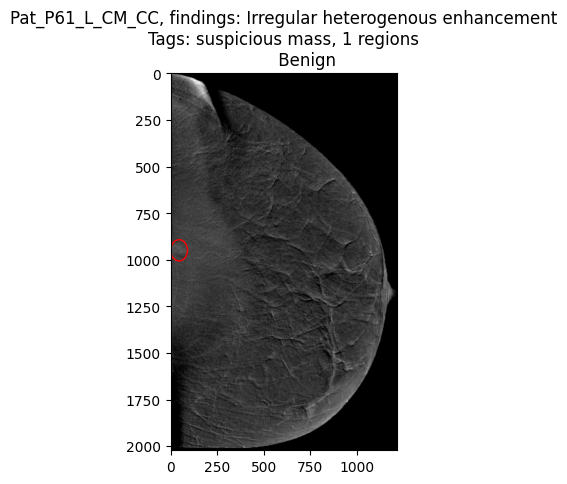

In [17]:
# get id of patients that are not in the annotations
not_in_original = our_filtering[~our_filtering['patient_id'].isin(annotations['Patient_ID'])]['patient_id'].unique()
print(f'Patients not in the original annotations: {not_in_original}')


dataset = dataset_CDD_CESM()
pat_example = patient_CDD(patient_id=not_in_original[0], dataset=dataset)
pat_example.set_image(step_num=7)
pat_example.plot_annotations(figsize=(3,5))

## Not in our filtering

In [18]:
not_in_ours = annotations[~annotations['Patient_ID'].isin(our_filtering['patient_id'])]['Patient_ID'].unique()
print(f'Patients not in our annotations: {not_in_ours}')

Patients not in our annotations: [ 12  18  20  27  31  40  45  53  60  62  71  74  81  87  88  89  90  97
 105 106 107 114 128 137 143 149 165 171 172 193 196 211 218 262 263 284
 285 289 304]


In [22]:
len(annotations['Patient_ID'].unique())

169